# Прогнозирование конечных свойств новых композиционных материалов  

Предоставленный dataset со свойствами композитов необходимо объеденить по индексу типа объединения <b>INNER</b>

<b>Задачи:</b>
<p>1.Обучить алгоритм машинного обучения, который будет определять значения:
<b><p>* Модуль упругости при растяжении, ГПа</p>
<p>* Прочность при растяжении, МПа<b></p></p> 
<p>2.Написать нейронную сеть, которая будет рекомендовать:
<p>* <b>Соотношение матрица-наполнитель</b><p> </p> 

In [1]:
#Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from tensorflow import keras
from keras import layers

<p> <b>Разведочный анализ данных </b> </p>


In [2]:
#загружаем файлы из dataset X_bp.xlsx, X_nup.xlsx

path_bp = 'C:/Users/Alexey/PycharmProjects/VKR_Mastiugin/data/X_bp.xlsx'
path_nup = 'C:/Users/Alexey/PycharmProjects/VKR_Mastiugin/data/X_nup.xlsx'

data_bp = pd.read_excel(path_bp,index_col=0)
data_nup = pd.read_excel(path_nup,index_col=0)

print('Строк в  bp - ', data_bp.shape)
print('Строк в nup - ', data_nup.shape)

Строк в  bp -  (1023, 10)
Строк в nup -  (1040, 3)


In [3]:
# файлы из dataset имееют разную длину строк.
# выводим первые 5 строк из X_bp.xlsx и X_nup.xlsx
data_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [4]:
data_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [5]:
#Объединяем данные по индексу, тип INNER
dataset = pd.merge(data_bp,data_nup,how='inner',left_index=True,right_index=True)
print('Строк в объединенном dataset - ', dataset.shape)
dataset.head()

Строк в объединенном dataset -  (1023, 13)


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [6]:
#В объединенном dataset получили 13 призанков, для наглядности их выводим на печать
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [7]:
#Подсчитываем количество уникальных значений по каждому из признаков
dataset.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [8]:
#Для признака "Угол нашивки, град" подсчитаем количество вхождений значений
dataset['Угол нашивки, град'].value_counts()

0     520
90    503
Name: Угол нашивки, град, dtype: int64

<b>Описательная статистика признаков</b>

In [9]:
#Выводим описательную статистику (количество строк, среднее значение, стандартное отклонение, миним., макс. значения)
description = dataset.describe().T
description['median'] = dataset.median()
description

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max       median  
Соотношение матрица-наполнитель          3.552660     5.591742     2.906878  
Плотность, кг/м3                      2021.374375  2207.773481  1977.621657  
модуль упругости, ГПа                  961.812526  1911.536477   739.664328  
Количество отвердителя, м.%            129.730366   198.953207   110.564840  
Содержание эпоксидных групп,%_2         23.961934    33.000000    22.230744  
Температура вспышки, С_2               313.002106   413.273418   285.896812  
Поверхностная плотность, г/м2          693.225017  1399.542362   451.864365  
Модуль упругости при растяжении, ГПа    75.356612    82.682051    73.268805  
Прочность при растяжении, МПа         2767.193119  3848.436732  2459.524526  
Потребление смолы, г/м2                257.481724   414.590628   219.198882  
Угол нашивки, град                      90.000000    90.000000     0.000000  
Шаг нашивки                              8.586293    14.440522     6.916144  
Плотность нашивки                       64.944961   103.988901    57.341920

In [10]:
#Проверяем есть ли пропуски в датасете
dataset.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [11]:
#количество пропусков - 0

In [12]:
#Для визуализации статистики удалим столбец count
del description['count']

<b>Гистограмма распределения и диаграмма размаха</b>

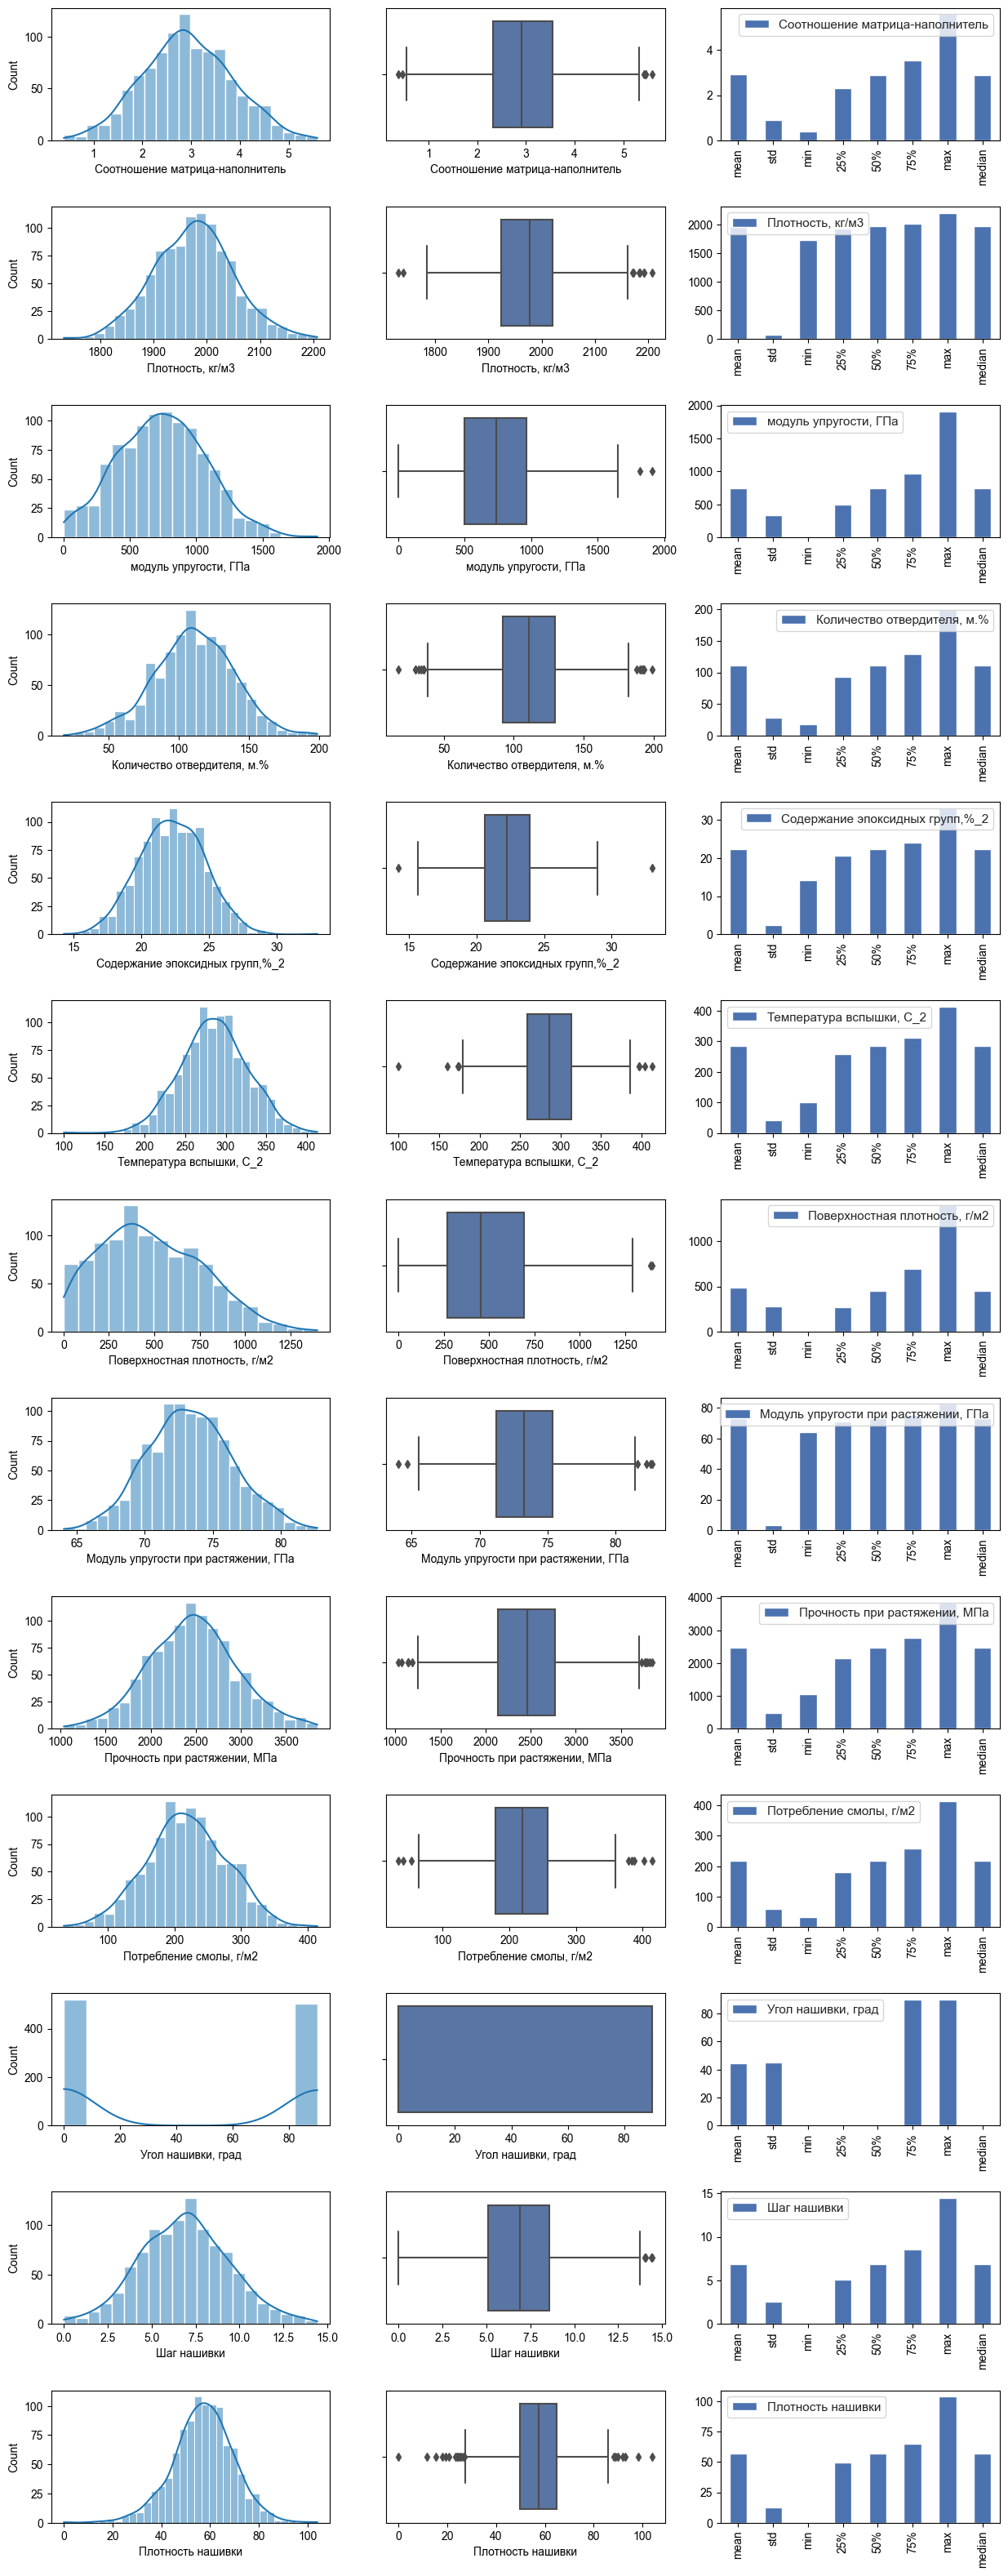

In [13]:
#Построим гистограмму распределения и диаграмму размаха ("ящик с усами") для каждого признака, также выведем статистику описательную
fig, axes = plt.subplots(13, 3, figsize=(15, 40))
plt.subplots_adjust(hspace=0.5)
sns.set(style="ticks")
for index, col in enumerate(dataset.columns):    
    col_des = pd.DataFrame(description.loc[col,:])
    sns.histplot(data=dataset, x=col, kde=True, ax=axes[index, 0])
    sns.boxplot(data=dataset, x=col, ax=axes[index, 1])
    col_des.plot(kind='bar', ax=axes[index, 2])    
plt.show()

<b>Попарные графики рассеяния точек</b>

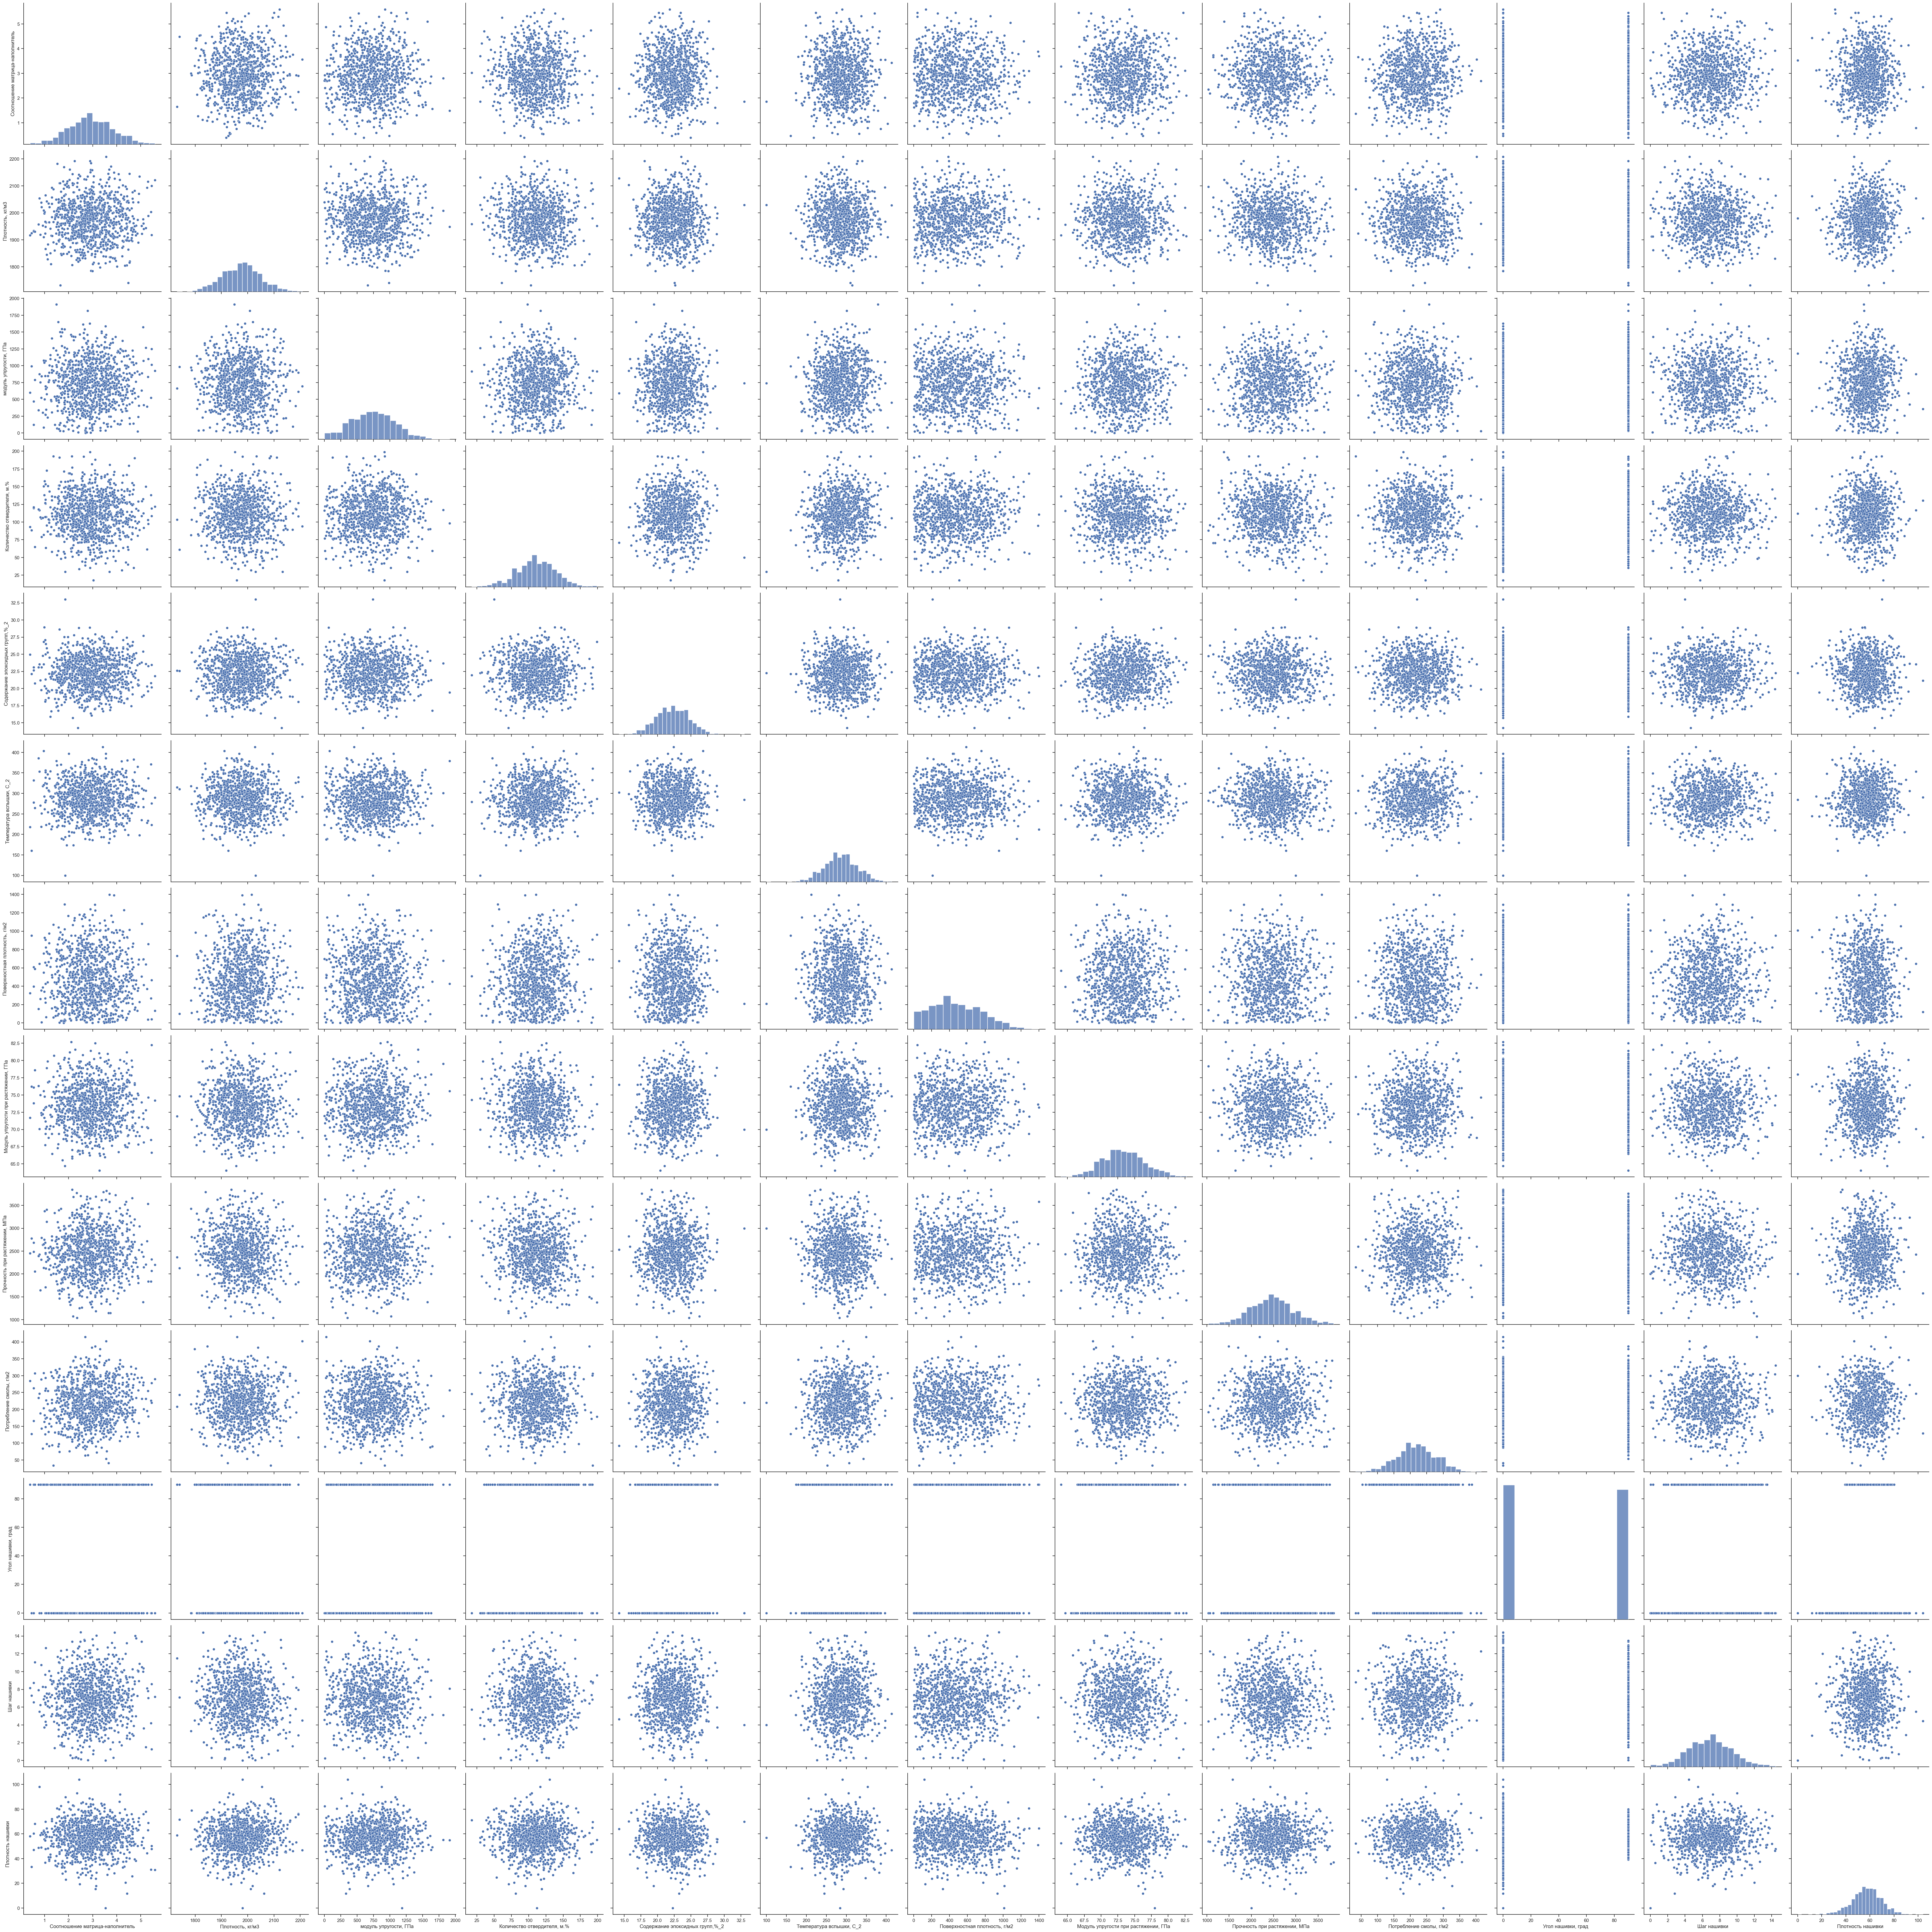

In [14]:
# Построим матрицу диаграмм рассеяния
sns.pairplot(dataset, height=5)

<b>Матрица корреляции</b>

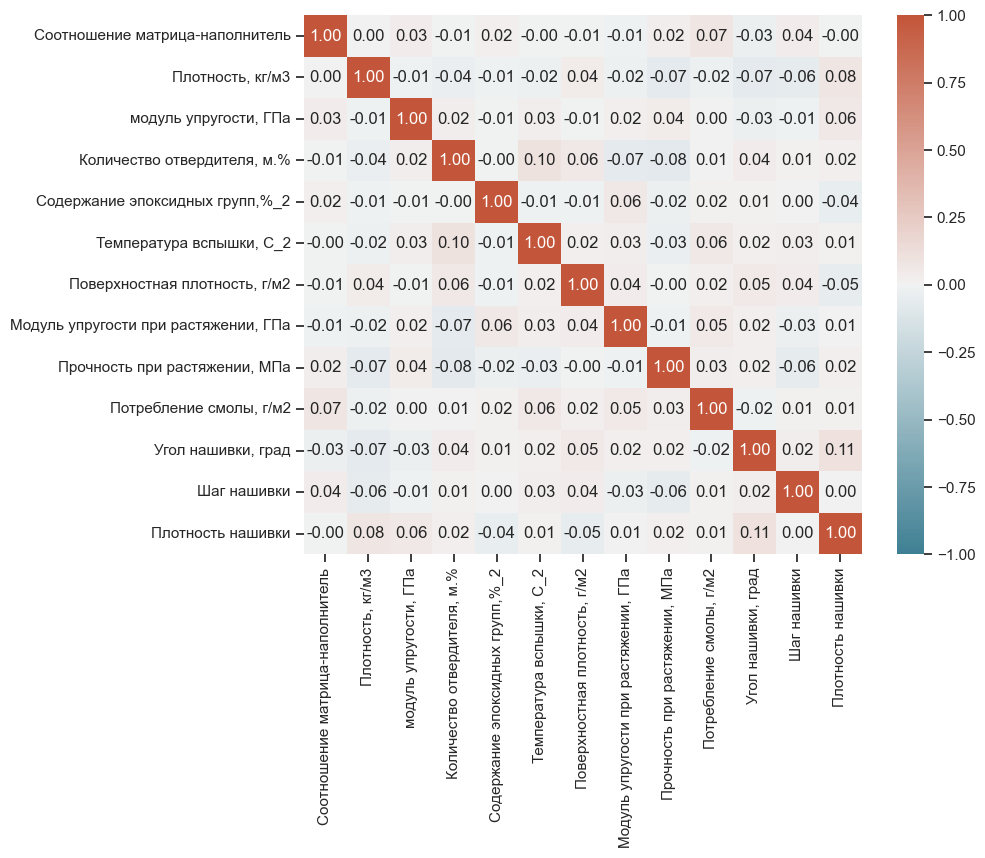

In [15]:
#Посмотрим матрицу корреляции
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(9, 7))
cmap_ = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, vmin=-1, vmax=1, ax=ax, cmap=cmap_,annot=True,fmt='.2f')
plt.show()

# min\max
#На тепловой карте значения далеки от 1. корреляция признаков практически отсутствует



<p><b>Поиск аномалий и выбросов</b></p>

In [16]:
#Поиск выбросов, используем 2 метода для данных с нормальным распределением
count_iqr = count_3sigm = 0
for col in dataset:
    column = dataset.loc[:, [col]]

    #метод межквартильного диапазона
    q25 = dataset[col].quantile(q=.25)
    q75 = dataset[col].quantile(q=.75)
    iqr = q75 - q25
    column['iqr'] = (dataset[col] < q25 - 1.5 * iqr) | (dataset[col] > q75 + 1.5 * iqr)
    count_iqr += column['iqr'].sum()
    
    # методом трех сигм
    std = dataset[col].std()
    mean = dataset[col].mean()    
    column['3sigm'] = (dataset[col] < mean - 3 * std) | (dataset[col] > mean + 3 * std) 
    count_3sigm += column['3sigm'].sum()

print('Методом трех сигм обнаружено выбросов:', count_3sigm)
print('Методом межквартильного диапазона обнаружено выбросов:', count_iqr)


Методом трех сигм обнаружено выбросов: 24
Методом межквартильного диапазона обнаружено выбросов: 93


# Предобработка данных.


<p><b>Выполняем удаление выбросов в объединенном dataset по методу 3 сигм, для сохранения полноты данных  

In [17]:
#Удаляем выбросы
indexes=[]
for col in dataset:
    column = dataset.loc[:, [col]]    
    std = dataset[col].std()
    mean = dataset[col].mean()    
    column['3sigm'] = (dataset[col] < mean - 3 * std) | (dataset[col] > mean + 3 * std) 
    indexes+=list(column[column['3sigm']==True].index)
    
dataset_clean = dataset[~dataset.index.isin(indexes)]
print('Размер очищенного датасета: ', dataset_clean.shape)


Размер очищенного датасета:  (1000, 13)


### Обработка категориального признака
 Признак 'Угол нашивки, град' превратим в бинарный, используем для этого <b>LabelEncoder</b>

In [18]:
#Кодировка LabelEncoder
le = LabelEncoder()
dataset_clean_un = pd.DataFrame(dataset_clean, copy=True)
dataset_clean_un['Угол нашивки, град'] = le.fit_transform(dataset_clean_un['Угол нашивки, град'].values)
dataset_clean_un['Угол нашивки, град'].value_counts()

0    504
1    496
Name: Угол нашивки, град, dtype: int64

### Нормализация данных с помощью MinMaxScaler  

In [19]:
#Проводим нормализацию данных с помощью метода MinMaxScaler
minmax_scalar = MinMaxScaler()
dataset_norm = minmax_scalar.fit_transform(dataset_clean_un)
#Преобразуем в датафрейм
dataset_norm_df = pd.DataFrame(data=dataset_norm,columns=dataset_clean_un.columns)
df = dataset_norm_df

In [20]:
#Смотрим описательную статистику полученного dataframe 
df.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       1000.0  0.489568  0.174687  0.0   
Плотность, кг/м3                      1000.0  0.467648  0.178696  0.0   
модуль упругости, ГПа                 1000.0  0.447024  0.198876  0.0   
Количество отвердителя, м.%           1000.0  0.496427  0.171089  0.0   
Содержание эпоксидных групп,%_2       1000.0  0.493216  0.179818  0.0   
Температура вспышки, С_2              1000.0  0.488654  0.174792  0.0   
Поверхностная плотность, г/м2         1000.0  0.371301  0.215155  0.0   
Модуль упругости при растяжении, ГПа  1000.0  0.497322  0.167158  0.0   
Прочность при растяжении, МПа         1000.0  0.507902  0.172506  0.0   
Потребление смолы, г/м2               1000.0  0.512370  0.170432  0.0   
Угол нашивки, град                    1000.0  0.496000  0.500234  0.0   
Шаг нашивки                           1000.0  0.477193  0.177586  0.0   
Плотность нашивки                     1000.0  0.507027  0.163634  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.370964  0.484284  0.608289  1.0  
Плотность, кг/м3                      0.340831  0.472347  0.579727  1.0  
модуль упругости, ГПа                 0.302576  0.448525  0.582408  1.0  
Количество отвердителя, м.%           0.384097  0.495388  0.613258  1.0  
Содержание эпоксидных групп,%_2       0.368597  0.492154  0.624396  1.0  
Температура вспышки, С_2              0.371985  0.488205  0.606271  1.0  
Поверхностная плотность, г/м2         0.206374  0.348844  0.535295  1.0  
Модуль упругости при растяжении, ГПа  0.386234  0.492609  0.605138  1.0  
Прочность при растяжении, МПа         0.390414  0.504890  0.612932  1.0  
Потребление смолы, г/м2               0.401220  0.513653  0.625772  1.0  
Угол нашивки, град                    0.000000  0.000000  1.000000  1.0  
Шаг нашивки                           0.351886  0.477999  0.593714  1.0  
Плотность нашивки                     0.405037  0.509730  0.612766  1.0

<b>в таблице все признаки нормализованы и лкжвт в диапозоне от [0, 1]</b>


### Машинное обучение

<p> Выбранные алгоритмы применяем для обучения нашей модели</p> 

<p> Задача алгоритма:<p>
    <p> определять <b>Модуль упругости при растяжении, ГПа,</b>
    <p> определять <b>Прочность при растяжении, МПа</b>

In [21]:
#Отделяем прогнозные значения y
y = df[['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа']]
X = df.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'], axis=1)
# y = df[['Прочность при растяжении, МПа']]
# X = df.drop(['Прочность при растяжении, МПа'], axis=1)

In [22]:
#Разделяем данные на обучающую и тестовую выборки в пропорции 70\30 % 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
print(X_train.shape)
X_train.head()

(700, 11)


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
839                         0.434486          0.166905               0.490482   
130                         0.361689          0.190933               0.866091   
948                         0.342091          0.257267               0.486290   
368                         0.493868          0.146473               0.585855   
951                         0.540434          0.520105               0.461599   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
839                     0.548745                         0.414314   
130                     0.586885                         0.628072   
948                     0.629680                         0.631988   
368                     0.228438                         0.026629   
951                     0.685251                         0.513576   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
839                  0.463275                       0.915541   
130                  0.626007                       0.226600   
948                  0.650259                       0.348503   
368                  0.490178                       0.298155   
951                  0.544400                       0.071527   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
839                 0.845034                 1.0     0.542891   
130                 0.518811                 0.0     0.018967   
948                 0.588564                 1.0     0.338367   
368                 0.614336                 0.0     0.355264   
951                 0.515589                 1.0     0.239604   

     Плотность нашивки  
839           0.547412  
130           0.684961  
948           0.581201  
368           0.784397  
951           0.389570

In [24]:
print(y_train.shape)
y_train.head()

(700, 2)


Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа
839                              0.456558                       0.512983
130                              0.941631                       0.491775
948                              0.605694                       0.395052
368                              0.379875                       0.327391
951                              0.437016                       0.483098

In [25]:
#Задейтвованные методы автоматической классификации объектов или регрессии
methods = [
            LinearRegression(), # метод наименьших квадратов
            KNeighborsRegressor(), # метод k-ближайших соседей            
            RandomForestRegressor(), # случайный лес            
            SVR(), # метод опорных векторов 
            DummyRegressor(), #простой регрессор
         ]

In [26]:
#Определим функцию, возвращающую возможные параметры для моделей
def getParams(method_number):
    if method_number==0:
        #LinearRegression
        params = {}    
    elif method_number==1:        
        #KNeighborsRegressor
        params = {
            'n_neighbors' : range(1, 40, 2), 
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
    elif method_number==2:
        #RandomForestRegressor
        params = {'n_estimators' : range(10, 100, 10),
                  'max_features' : ['sqrt','log2', None]}
    elif method_number==3: 
        #SVR
        params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']                    
                }
    elif method_number==4:
        params = {'strategy': ['mean', 'median', 'quantile', 'constant']}
    else:
        params = {}
    return params

In [27]:
#Отключим предупреждения об использовании устаревших методов
import warnings
warnings.filterwarnings('ignore')

In [28]:
%%time
#В цикле переберем модели, и с помощью GridSearchCV подберем лучшие параметры

scores_df = pd.DataFrame()
row = {}
#для каждого метода по списку
for index, method in enumerate(methods):    

    params = getParams(index)    
    row['Method'] = str(method)
    print('Метод: ',str(method))
    #для каждого столбца    
    for j in range(2):    
        gscv = GridSearchCV(method, params, cv=10)
        gscv.fit(X_train, y_train.iloc[:,j])
        print('Для столбца y'+str(j+1)+' лучшие параметры:',gscv.best_params_)
        
        best_estimator_= gscv.best_estimator_
        row['R2_y'+str(j+1)] = r2_score(y_test.iloc[:,j], best_estimator_.predict(X_test))   
        row['MAE_y'+str(j+1)] = mean_absolute_error(y_test.iloc[:,j], best_estimator_.predict(X_test))           
        row['MSE_y'+str(j+1)] = mean_squared_error(y_test.iloc[:,j], best_estimator_.predict(X_test))           
    #запишем полученный результат в датафрейм
    scores_df = scores_df.append([row])
    
#в качестве индекса задаем столбец Method 
scores_df.set_index('Method', inplace=True)

Метод:  LinearRegression()
Для столбца y1 лучшие параметры: {}
Для столбца y2 лучшие параметры: {}
Метод:  KNeighborsRegressor()
Для столбца y1 лучшие параметры: {'algorithm': 'auto', 'n_neighbors': 39, 'weights': 'uniform'}
Для столбца y2 лучшие параметры: {'algorithm': 'auto', 'n_neighbors': 37, 'weights': 'uniform'}
Метод:  RandomForestRegressor()
Для столбца y1 лучшие параметры: {'max_features': 'sqrt', 'n_estimators': 70}
Для столбца y2 лучшие параметры: {'max_features': 'sqrt', 'n_estimators': 60}
Метод:  SVR()
Для столбца y1 лучшие параметры: {'kernel': 'linear'}
Для столбца y2 лучшие параметры: {'kernel': 'linear'}
Метод:  DummyRegressor()
Для столбца y1 лучшие параметры: {'strategy': 'mean'}
Для столбца y2 лучшие параметры: {'strategy': 'median'}
CPU times: total: 3min 23s
Wall time: 2min 52s


In [29]:
#Выводим коэффициенты детерминации
scores_df

R2_y1    MAE_y1    MSE_y1     R2_y2    MAE_y2  \
Method                                                                      
LinearRegression()      -0.018057  0.134816  0.027541  0.006504  0.135497   
KNeighborsRegressor()    0.002470  0.132152  0.026985 -0.004529  0.134782   
RandomForestRegressor() -0.024491  0.132840  0.027715 -0.004330  0.136312   
SVR()                   -0.011463  0.134232  0.027362  0.008530  0.135127   
DummyRegressor()        -0.007044  0.132620  0.027243 -0.000548  0.133991   

                           MSE_y2  
Method                             
LinearRegression()       0.029131  
KNeighborsRegressor()    0.029454  
RandomForestRegressor()  0.029448  
SVR()                    0.029071  
DummyRegressor()         0.029337

<Axes: title={'center': 'R2 для Прочности при растяжении, МПа'}, xlabel='Method'>

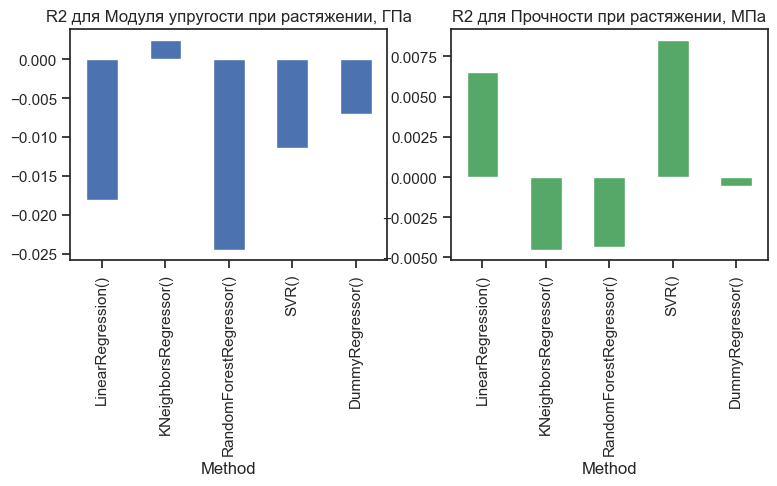

In [30]:
#Визуализируем коэффициенты детерминации для представленных методов
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,3))
scores_df.R2_y1.plot(ax=axes[0], kind='bar', color='C0', title='R2 для Модуля упругости при растяжении, ГПа')
scores_df.R2_y2.plot(ax=axes[1], kind='bar', color='C2', title='R2 для Прочности при растяжении, МПа')

<Axes: title={'center': 'MAE для Прочности при растяжении, МПа'}, xlabel='Method'>

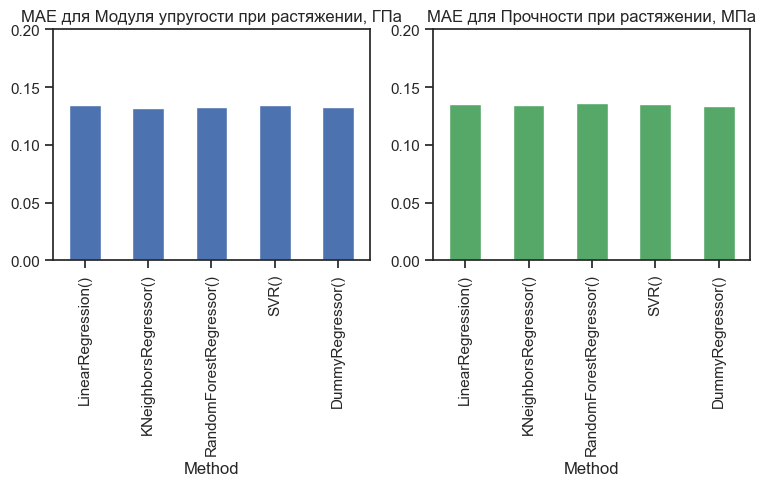

In [31]:
#Визуализируем среднюю абсолютную ошибку
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,3))
scores_df.MAE_y1.plot(ylim=[0,0.2],ax=axes[0], kind='bar', color='C0', title='MAE для Модуля упругости при растяжении, ГПа')
scores_df.MAE_y2.plot(ylim=[0, 0.2], ax=axes[1], kind='bar', color='C2', title='MAE для Прочности при растяжении, МПа')

In [32]:
# В сухом остатке, ни одна модель не показала значимой зависимости по критерию r2.
# Можно сделать вывод, что модели обладают низкой предсказательной способностью.

### Построение нейронной сети

Требуется построить нейронную сеть, которая будет рекомендовать:
<p><b>Соотношение матрица-наполнитель</b></p>


In [34]:
#Отделяем прогнозные значения y
y_ = dataset_clean[['Соотношение матрица-наполнитель']]
X_ = dataset_clean.drop(['Соотношение матрица-наполнитель'], axis=1)

In [35]:
#Разделяем данные на обучающую и тестовую выборки, оставим 30% для тестовой
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3)

In [36]:
#Выводим описательную статистику
X_train_.describe().T

count         mean         std  \
Плотность, кг/м3                      700.0  1974.971705   73.801990   
модуль упругости, ГПа                 700.0   740.845011  321.155978   
Количество отвердителя, м.%           700.0   110.834543   27.359622   
Содержание эпоксидных групп,%_2       700.0    22.121499    2.374043   
Температура вспышки, С_2              700.0   284.545160   41.112560   
Поверхностная плотность, г/м2         700.0   477.589824  281.481937   
Модуль упругости при растяжении, ГПа  700.0    73.221707    3.081058   
Прочность при растяжении, МПа         700.0  2471.263176  486.882399   
Потребление смолы, г/м2               700.0   217.576285   60.531378   
Угол нашивки, град                    700.0    44.357143   45.027582   
Шаг нашивки                           700.0     6.884274    2.544832   
Плотность нашивки                     700.0    57.386616   12.005502   

                                              min          25%          50%  \
Плотность, кг/м3                      1784.482245  1920.835098  1976.867228   
модуль упругости, ГПа                    2.436909   516.629193   750.072374   
Количество отвердителя, м.%             29.956150    92.902601   111.230115   
Содержание эпоксидных групп,%_2         15.695894    20.473291    22.122525   
Температура вспышки, С_2               173.484920   257.033588   284.186619   
Поверхностная плотность, г/м2            0.603740   260.362433   444.190252   
Модуль упругости при растяжении, ГПа    64.696400    71.173683    73.055915   
Прочность при растяжении, МПа         1143.210334  2139.477808  2465.913940   
Потребление смолы, г/м2                 41.048278   177.411161   216.691628   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.037639     5.000000     6.873226   
Плотность нашивки                       20.571633    49.892983    57.379601   

                                              75%          max  
Плотность, кг/м3                      2021.865610  2192.738783  
модуль упругости, ГПа                  957.028902  1615.096973  
Количество отвердителя, м.%            130.311975   188.049898  
Содержание эпоксидных групп,%_2         23.910064    28.955094  
Температура вспышки, С_2               312.475126   403.652861  
Поверхностная плотность, г/м2          694.524461  1291.340115  
Модуль упругости при растяжении, ГПа    75.222268    82.682051  
Прочность при растяжении, МПа         2762.637197  3848.436732  
Потребление смолы, г/м2                257.474775   386.903431  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.551201    14.440522  
Плотность нашивки                       65.112752    92.042139

In [37]:
#Создаем слой нормализации данных 
normalizer = layers.Normalization(axis=-1)

In [38]:
#вычисляем среднее значение и дисперсию значений в наборе данных.
normalizer.adapt(np.array(X_train_))

In [39]:
X_train_

Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
323        2122.848291             554.000846                   127.542093   
114        2019.552159            1063.742781                   146.035949   
1004       2038.289409             767.897075                    83.191553   
541        1900.447879             778.356422                    43.454556   
726        1828.411757             231.287376                    86.849350   
...                ...                    ...                          ...   
437        2026.110475             778.439915                   133.388202   
655        1945.934610             113.938512                    63.526815   
772        2053.169866             692.126623                   137.037382   
755        1858.862775             307.232901                    84.541511   
566        1901.357022             842.301190                   151.259793   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
323                         24.581171                299.961336   
114                         23.695911                295.731698   
1004                        25.627620                249.612303   
541                         25.437709                268.521892   
726                         25.282911                346.952895   
...                               ...                       ...   
437                         26.145994                304.525939   
655                         21.616401                296.373995   
772                         22.192903                321.731011   
755                         27.920843                223.294202   
566                         22.878357                314.622062   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
323                      823.370711                             75.963543   
114                      822.311634                             70.648753   
1004                     774.578473                             71.279418   
541                      409.637966                             73.709184   
726                      444.037560                             79.893823   
...                             ...                                   ...   
437                      795.668948                             72.429976   
655                      807.273814                             75.990895   
772                      510.899266                             72.950573   
755                      415.463131                             70.713530   
566                      519.668523                             74.615810   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
323                     2291.407954               106.716579   
114                     2700.665341               194.238670   
1004                    2768.839085               266.956745   
541                     1727.395939                63.685698   
726                     2371.422563               215.919086   
...                             ...                      ...   
437                     2445.124507               143.648059   
655                     2975.643321               243.055823   
772                     2375.844742               266.368788   
755                     2347.684613               248.318925   
566                     2199.094352               300.534497   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
323                    0     7.034657          69.355719  
114                    0    14.051383          74.469002  
1004                  90     2.751101          63.681745  
541                   90     8.015561          70.035767  
726                   90     6.125185          61.461204  
...                  ...          ...                ...  
437                    0     7.068822          83.957249  
655                   90    13.374855          71.332088  
772                   90     8.292878  

In [40]:
y_train_

Соотношение матрица-наполнитель
323                          4.122581
114                          3.153404
1004                         1.580433
541                          2.694356
726                          1.120752
...                               ...
437                          3.485427
655                          2.147426
772                          3.750125
755                          3.104559
566                          1.620786

[700 rows x 1 columns]

In [41]:
#нормализованные значения
normalizer(X_train_).numpy()

array([[ 2.0051281 , -0.582202  ,  0.6111017 , ..., -0.9858148 ,
         0.05913612,  0.9976815 ],
       [ 0.6044867 ,  1.0061427 ,  1.2875395 , ..., -0.9858148 ,
         2.818353  ,  1.4238975 ],
       [ 0.8585545 ,  0.08429401, -1.0110791 , ...,  1.0143893 ,
        -1.6253049 ,  0.52472883],
       ...,
       [ 1.0603259 , -0.15180504,  0.95840484, ...,  1.0143893 ,
         0.55391157,  0.40384313],
       [-1.5743737 , -1.3511255 , -0.96170247, ...,  1.0143893 ,
         0.12930544, -0.5862598 ],
       [-0.9981745 ,  0.31613562,  1.4786087 , ...,  1.0143893 ,
         0.22963683,  0.62251985]], dtype=float32)

In [42]:
print(normalizer.mean.numpy())

[[1974.9717     740.8449     110.834526    22.121494   284.54517
   477.5898      73.221695  2471.2627     217.57628     44.35714
     6.8842735   57.386612 ]]


In [43]:
#определим метод, рисующий функцию ошибки
def draw_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE [Соотношение матрица-наполнитель]')
    plt.legend()
    plt.grid(True)

<b>Рассмотрим различные модели нейронной сети:</b>

1) линейная модель со слоем нормализации

In [46]:
#линейная модель
def get_linear_model(norm):
    model = keras.Sequential(
        [norm,
        layers.Dense(units=1, name='out')
        ])
    #model.compile(loss='mean_absolute_error',optimizer='adam')
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

2) модель со слоем нормализации и двумя скрытыми слоями по 8 нейронов

In [48]:
#многослойный перцептрон
def get_twolayer_model(norm):
    model = keras.Sequential(
        [norm,
        layers.Dense(8, activation='relu', name='dense_8u_1'),
        layers.Dense(8, activation='relu', name='dense_8u_2'),
        layers.Dense(1, name='out')
        ])
    #model.compile(loss='mean_absolute_error', optimizer='adam')    
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

3) модель со слоем нормализации и двумя скрытыми слоями по 16 нейронов

In [50]:
#многослойный перцептрон
def get_twolayer_model_16u(norm):
    model = keras.Sequential(
        [norm,
        layers.Dense(16, activation='relu', name='dense_16u_1'),
        layers.Dense(16, activation='relu', name='dense_16u_2'),
        layers.Dense(1, name='out')
        ])
    #model.compile(loss='mean_absolute_error', optimizer='adam')    
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

4) модель со слоем нормализации и 6 скрытыми слоями по 16 нейронов

In [53]:
#многослойный перцептрон
def get_multilayer_model(norm):
    model = keras.Sequential(
        [norm,
        layers.Dense(16, activation='relu', name='dense_16u_1'),
        layers.Dense(16, activation='relu', name='dense_16u_2'),
        layers.Dense(16, activation='relu', name='dense_16u_3'),        
        layers.Dense(16, activation='relu', name='dense_16u_4'),  
        layers.Dense(16, activation='relu', name='dense_16u_5'),  
        layers.Dense(16, activation='relu', name='dense_16u_6'),  
        layers.Dense(1, name='out')
        ])
    #model.compile(loss='mean_absolute_error', optimizer='adam')    
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

In [54]:
#полученные результаты сохраним в test_results
test_results={}

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 out (Dense)                 (None, 1)                 13        
                                                                 
Total params: 38
Trainable params: 13
Non-trainable params: 25
_________________________________________________________________


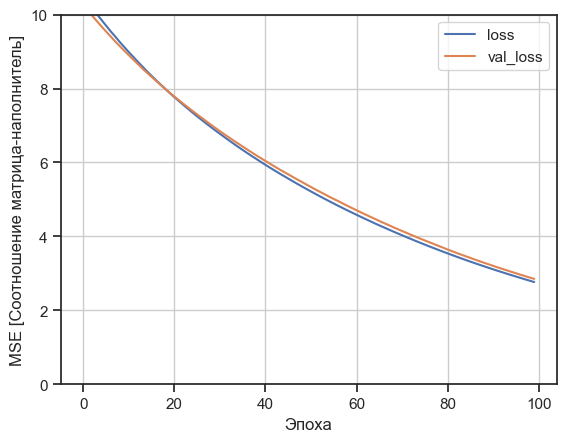

In [69]:
#Линейная модель - обучение
model_linear =get_linear_model(normalizer)
model_linear.summary()
history_linear = model_linear.fit(X_train_,y_train_,validation_split=0.2,verbose=0,epochs=100,
                                          callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)])

draw_loss(history_linear)

In [63]:
#Оценка модели на тестовых данных
test_results['linear'] = model_linear.evaluate(X_test_, y_test_, verbose=1)

10/10 [==============================] - 0s 1ms/step - loss: 2.1505


Видим, что линейная модель очень медленно обучается.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_8u_1 (Dense)          (None, 8)                 104       
                                                                 
 dense_8u_2 (Dense)          (None, 8)                 72        
                                                                 
 out (Dense)                 (None, 1)                 9         
                                                                 
Total params: 210
Trainable params: 185
Non-trainable params: 25
_________________________________________________________________


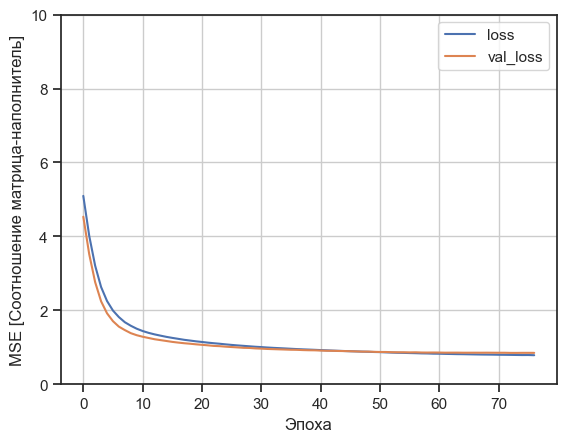

In [68]:
#перцептрон с двумя скрытыми слоями  по 8 нейронов
model_twolayer =get_twolayer_model(normalizer)
model_twolayer.summary()
history_twolayer = model_twolayer.fit(X_train_,y_train_,validation_split=0.2,verbose=0,epochs=100
                                ,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

draw_loss(history_twolayer)

In [70]:
#Оценка модели на тестовых данных
test_results['twolayer_8u'] = model_twolayer.evaluate(X_test_, y_test_, verbose=1)

10/10 [==============================] - 0s 1ms/step - loss: 0.9747


Обучение происходит быстрее, loss на тестовых данных уже лучше чем для линейной модели.

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_16u_1 (Dense)         (None, 16)                208       
                                                                 
 dense_16u_2 (Dense)         (None, 16)                272       
                                                                 
 out (Dense)                 (None, 1)                 17        
                                                                 
Total params: 522
Trainable params: 497
Non-trainable params: 25
_________________________________________________________________


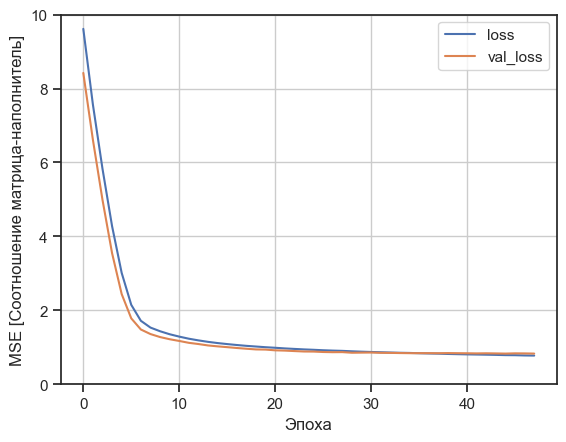

In [72]:
#перцептрон с двумя скрытыми слоями по 16 нейронов
model_twolayer_16u =get_twolayer_model_16u(normalizer)
model_twolayer_16u.summary()
history_twolayer_16u = model_twolayer_16u.fit(X_train_,y_train_,validation_split=0.2,verbose=0,epochs=100
                                ,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

draw_loss(history_twolayer_16u)

In [73]:
#Оценка модели на тестовых данных
test_results['twolayer_16u'] = model_twolayer_16u.evaluate(X_test_, y_test_, verbose=1)

10/10 [==============================] - 0s 1ms/step - loss: 1.0052


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_16u_1 (Dense)         (None, 16)                208       
                                                                 
 dense_16u_2 (Dense)         (None, 16)                272       
                                                                 
 dense_16u_3 (Dense)         (None, 16)                272       
                                                                 
 dense_16u_4 (Dense)         (None, 16)                272       
                                                                 
 dense_16u_5 (Dense)         (None, 16)                272       
                                                     

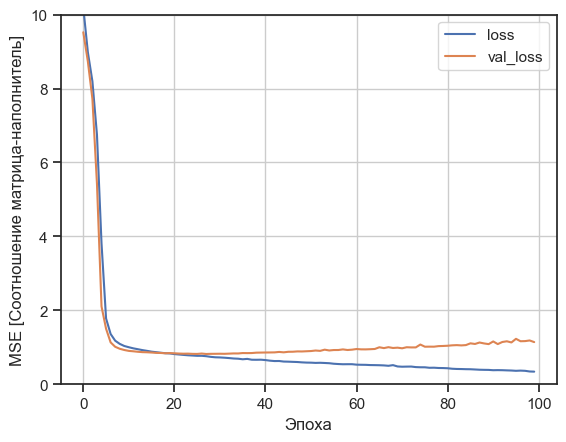

In [74]:
#многослойный персептрон
model_multilayer =get_multilayer_model(normalizer)
model_multilayer.summary()
history_multilayer = model_multilayer.fit(X_train_,y_train_,validation_split=0.2,verbose=0,epochs=100)#,
                                          #callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])
draw_loss(history_multilayer)

In [75]:
#Оценка модели на тестовых данных
test_results['multylayer'] = model_multilayer.evaluate(X_test_, y_test_, verbose=1)

10/10 [==============================] - 0s 1ms/step - loss: 1.2965


На графике видим, что довольно быстро происходит переоубчение модели